In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [8]:
def calc_logloss(y, y_pred):
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  return err

In [9]:
np.log(0.9)

-0.10536051565782628

In [10]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [11]:
def sigmoid(z):
  res = 1 / (1 + np.exp(-z))
  return res

In [12]:
z = np.linspace(-10, 10, 101)
z

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

In [13]:
probabilities = sigmoid(z)

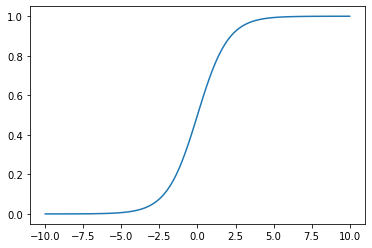

In [14]:
plt.plot(z, probabilities)

In [15]:
### Logistic Regression

In [57]:
def eval_model(X, y, iterations, alpha=1e-4):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % 2000 == 0:
      print(i, W, err)
  return W

In [17]:
W = np.random.randn(X.shape[0])
z = np.dot(W, X)
z

array([ -813.27006492, -1138.84386559, -1219.51054574,  -976.05696526,
       -2360.52728579, -1300.12232819, -2442.70240366, -3264.17909397,
        -731.87661476, -1626.47779657])

In [18]:
X.T

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [19]:
np.dot((0.7 - y), X.T)

array([   2. ,    5.2, 1675. ,    1.9])

In [20]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [21]:
W = eval_model(X_st, y, iterations=1000, alpha=1e-4)

100 [ 0.49282748 -0.15007528  0.64748973  1.51727915] 1.2014814214705334
200 [ 0.48896219 -0.16184918  0.64728128  1.51155738] 1.1828456288538924
300 [ 0.48511874 -0.17358386  0.64706349  1.50586552] 1.1643525542846553
400 [ 0.4812976  -0.18527698  0.64683669  1.50020462] 1.1460086359433084
500 [ 0.47749927 -0.19692597  0.64660127  1.4945758 ] 1.127820879406358
600 [ 0.47372426 -0.20852799  0.6463577   1.48898028] 1.109796908143704
700 [ 0.46997312 -0.22007992  0.6461065   1.48341934] 1.0919450148769096
800 [ 0.46624642 -0.23157833  0.64584825  1.47789438] 1.074274212586137
900 [ 0.46254476 -0.24301946  0.64558365  1.4724069 ] 1.0567942835649755
1000 [ 0.45886878 -0.25439917  0.64531344  1.46695851] 1.0395158244739489


2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?
7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [31]:
def log_loss_minimized(func,X_st,y):
    alpha=[1e-2,1e-3,1e-4,1e-5]
    for alpha_ in alpha:
        print(f'Скорость обучения:{alpha_}')
        func(X_st, y, iterations=20000, alpha=alpha_)

In [32]:
log_loss_minimized(eval_model,X_st,y)

Скорость обучения:0.01
200 [ 0.14805533 -0.69317972  0.77965488  1.21287192] 0.5687278067099053
400 [-0.00887935 -0.68415387  0.90713736  1.22443854] 0.5476800278385013
600 [-0.1239972  -0.69202069  0.98318257  1.26924759] 0.5369841864977791
800 [-0.21681092 -0.7078635   1.03062761  1.32973537] 0.5295551503580799
1000 [-0.29764618 -0.72670545  1.061634    1.39666497] 0.5233765331724747
1200 [-0.37188064 -0.7461597   1.08260067  1.46531853] 0.517849884671324
1400 [-0.44230332 -0.76510554  1.09696619  1.53338645] 0.5127677838840146
1600 [-0.51036921 -0.783047    1.10664485  1.59979796] 0.5080360394424425
1800 [-0.57684595 -0.79979671  1.11275552  1.66410902] 0.503597783659264
2000 [-0.64214517 -0.81531815  1.11599369  1.72618787] 0.4994117173889703
2200 [-0.70649271 -0.82964642  1.11682329  1.78605451] 0.495445152376875
2400 [-0.77001652 -0.8428484   1.11557702  1.84379918] 0.4916712819232016
2600 [-0.83279239 -0.85500278  1.11250957  1.89954117] 0.4880677793843522
2800 [-0.89486786 -0.8

4400 [-0.03425307 -0.68475074  0.92526334  1.23156643] 0.5450349299152675
4600 [-0.0464914  -0.68525275  0.9337818   1.23550334] 0.5438440495616377
4800 [-0.05839486 -0.68589164  0.94188188  1.2396968 ] 0.5427171930373043
5000 [-0.06998375 -0.68665668  0.94958779  1.24412884] 0.5416473056405606
5200 [-0.08127717 -0.68753785  0.95692225  1.24878249] 0.5406281706342996
5400 [-0.09229309 -0.68852585  0.96390658  1.25364175] 0.5396543113067727
5600 [-0.10304842 -0.68961201  0.97056077  1.25869155] 0.5387209037824571
5800 [-0.11355901 -0.69078827  0.97690358  1.26391768] 0.5378236995795522
6000 [-0.12383979 -0.69204716  0.98295258  1.26930679] 0.5369589569591279
6200 [-0.13390473 -0.6933817   0.98872424  1.27484633] 0.5361233801705033
6400 [-0.14376698 -0.69478544  0.994234    1.28052452] 0.5353140657629132
6600 [-0.15343883 -0.69625237  0.99949635  1.2863303 ] 0.5345284552012466
6800 [-0.16293185 -0.69777688  1.00452483  1.29225331] 0.5337642930910362
7000 [-0.17225684 -0.69935379  1.00933

9200 [ 0.26908563 -0.67568402  0.68069034  1.24699767] 0.593827580007551
9400 [ 0.26628249 -0.67741647  0.68259603  1.24544767] 0.5929826660242676
9600 [ 0.26351645 -0.67902387  0.6845082   1.24396635] 0.5921781673769119
9800 [ 0.26078589 -0.68051436  0.68642571  1.24255006] 0.5914099510484931
10000 [ 0.25808924 -0.68189547  0.68834749  1.2411954 ] 0.5906743816929662
10200 [ 0.25542505 -0.68317423  0.69027255  1.23989916] 0.5899682569461178
10400 [ 0.25279195 -0.68435715  0.6922      1.23865835] 0.589288751833154
10600 [ 0.25018866 -0.68545031  0.694129    1.23747015] 0.5886333708861267
10800 [ 0.24761396 -0.68645937  0.69605878  1.23633193] 0.5879999068115593
11000 [ 0.2450667  -0.68738962  0.69798863  1.2352412 ] 0.5873864047365669
11200 [ 0.24254582 -0.688246    0.69991791  1.23419565] 0.5867911312174114
11400 [ 0.24005029 -0.68903312  0.70184599  1.23319308] 0.5862125473235315
11600 [ 0.23757915 -0.6897553   0.70377233  1.23223142] 0.5856492852173543
11800 [ 0.2351315  -0.69041658 

14200 [ 0.44372743 -0.30140975  0.64413813  1.44454563] 0.9692808476581496
14400 [ 0.4430189  -0.30361255  0.64408144  1.44349876] 0.9660540423830886
14600 [ 0.44231157 -0.30581172  0.64402477  1.44245389] 0.9628381942466302
14800 [ 0.44160543 -0.30800718  0.64396811  1.44141104] 0.9596334299109781
15000 [ 0.44090049 -0.31019889  0.64391148  1.44037022] 0.9564398772858287
15200 [ 0.44019676 -0.31238679  0.64385491  1.43933147] 0.9532576654998998
15400 [ 0.43949425 -0.31457081  0.64379838  1.43829479] 0.9500869248701986
15600 [ 0.43879297 -0.31675091  0.64374193  1.43726021] 0.9469277868689335
15800 [ 0.43809292 -0.31892703  0.64368555  1.43622774] 0.9437803840880559
16000 [ 0.43739411 -0.3210991   0.64362927  1.43519741] 0.9406448502013415
16200 [ 0.43669654 -0.32326707  0.64357309  1.43416925] 0.9375213199239939
16400 [ 0.43600023 -0.32543087  0.64351703  1.43314326] 0.9344099289696983
16600 [ 0.43530518 -0.32759045  0.6434611   1.43211947] 0.9313108140051044
16800 [ 0.4346114  -0.329

Log_loss минимальный при скорости обучения 1е-2

In [53]:
def calc_pred_proba(w,x):
    
    y_pred_proba=sigmoid(np.dot(x.T,w))
    return y_pred_proba
    

In [58]:
calc_pred_proba(eval_model(X_st, y, iterations=15000, alpha=1e-2),X_st)

2000 [-0.64214517 -0.81531815  1.11599369  1.72618787] 0.4994117173889703
4000 [-1.25395556 -0.91702026  1.05407927  2.24381099] 0.4663484120925518
6000 [-1.80709894 -0.96248191  0.90882535  2.64121123] 0.4419377780140083
8000 [-2.31061284 -0.98407392  0.73840308  2.97395036] 0.422228649670574
10000 [-2.77079473 -0.99580928  0.56650766  3.2676589 ] 0.405830538777331
12000 [-3.1930393  -1.00395089  0.4027675   3.53513264] 0.391986451158745
14000 [-3.58213405 -1.01124986  0.25049437  3.78323688] 0.38017043217510194


array([0.25837324, 0.27275949, 0.87259994, 0.26550415, 0.76267207,
       0.51778979, 0.95509356, 0.1378597 , 0.25485493, 0.88250437])

In [61]:
def calc_pred(w,x):
    
    y_pred_proba=sigmoid(np.dot(x.T,w))
    y_pred=[1 if 1-i<0.5 else 0 for i in y_pred_proba]
    return y_pred

In [84]:
y_pred=calc_pred(eval_model(X_st, y, iterations=70000, alpha=1e-2),X_st)

2000 [-0.64214517 -0.81531815  1.11599369  1.72618787] 0.4994117173889703
4000 [-1.25395556 -0.91702026  1.05407927  2.24381099] 0.4663484120925518
6000 [-1.80709894 -0.96248191  0.90882535  2.64121123] 0.4419377780140083
8000 [-2.31061284 -0.98407392  0.73840308  2.97395036] 0.422228649670574
10000 [-2.77079473 -0.99580928  0.56650766  3.2676589 ] 0.405830538777331
12000 [-3.1930393  -1.00395089  0.4027675   3.53513264] 0.391986451158745
14000 [-3.58213405 -1.01124986  0.25049437  3.78323688] 0.38017043217510194
16000 [-3.94231774 -1.01882634  0.11016039  4.01595445] 0.3699834335313109
18000 [-4.27730123 -1.02705405 -0.01895896  4.23581413] 0.3611150348100095
20000 [-4.59029892 -1.03598171 -0.13800874  4.44457898] 0.35332194770044845
22000 [-4.8840745  -1.04553097 -0.24820145  4.64358332] 0.3464126408100555
24000 [-5.16099402 -1.05558614 -0.35066914  4.83390067] 0.3402355619384207
26000 [-5.42307982 -1.0660321  -0.44641265  5.01643007] 0.33467005859344073
28000 [-5.67206106 -1.0767682

In [85]:
def accuracy(y,y_pred):
    true_answer=0
    for i in range(len(y)):
        if y[i]==y_pred[i]:
            true_answer+=1
    return true_answer/len(y)
accuracy(y,y_pred)

0.9

In [86]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [87]:
y_pred

[0, 0, 1, 0, 1, 0, 1, 0, 0, 1]

In [88]:
def error_matrix(y,y_pred):
    e_m=np.zeros(4)
    for i in range(len(y)):
        if y[i]==1 and y_pred[i]==1:
            e_m[0]+=1
        elif y[i]==0 and y_pred[i]==1:
            e_m[1]+=1
        elif y[i]==1 and y_pred[i]==0:
            e_m[2]+=1
        elif y[i]==0 and y_pred[i]==0:
            e_m[3]+=1
        
    return e_m
e_m=error_matrix(y,y_pred)
e_m

array([4., 0., 1., 5.])

In [89]:
def metrics(e_m):
    precision=e_m[0]/(e_m[0]+e_m[1])
    recall=e_m[0]/(e_m[0]+e_m[2])
    return precision,recall
metrics(e_m)

(1.0, 0.8)

C увеличением количества итераций обучения модель начинает сокращать ошибку и увеличивать кол-во правильных ответов, скорее всего имеет место переобучение, модель просто подстраивается под правильные ответы. Проверить это не представляется возможным, так как нет тестовой и обучающей выборки. 